<a href="https://colab.research.google.com/github/AlexandreSauze/Free-Time-Python-Projects/blob/main/NDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Data Frames
import numpy as np #Statistics
import matplotlib.pyplot as plt #plots
import matplotlib as mpl #plots
import pydot #Mind maps

data1 = pd.read_csv('') #import csv to pandas

In [ ]:
pd.set_option('display.float_format', '{:20,.3f}'.format)
data1.describe() #statistical summary of data frame's columns

In [ ]:
data1.Cliente.value_counts()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data1.Proveedor.value_counts()[data1.Proveedor.value_counts() > 10]

In [ ]:
data1.NACIONALIDAD.value_counts()

In [ ]:
data1.PAIS.value_counts()

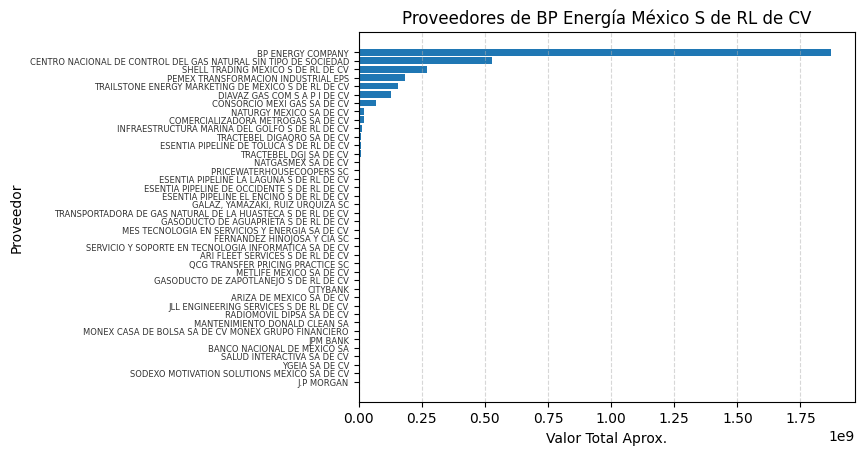

In [ ]:
RS = dict(data1[data1.Cliente == 'BP ENERGIA MEXICO S DE RL DE CV'].groupby('Proveedor')['Valor Total'].agg('sum'))
RS = dict(sorted(RS.items(), key = lambda x:x[1]))
plt.barh(list(RS.keys()), list(RS.values()))
plt.yticks(fontsize = 6, alpha = 0.8);
plt.xlabel('Valor Total Aprox.')
plt.ylabel('Proveedor')
plt.title('Proveedores de BP Energía México S de RL de CV');
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)

***Network Map***

In [ ]:
import plotly.graph_objects as go
import networkx as nx

In [ ]:
#******TEST*****
map = nx.Graph()
CL = {}

for i in data1.Cliente.unique().tolist():
  CL.update({i:data1[data1.Cliente == i].Proveedor.unique().tolist()})
cc = 0
for i in CL:
  map.add_edge('Clientes',i)
  for j in CL[i]:
    map.add_edge(i,j)
  if cc >= 1:
    break
  cc += 1

plt.plot()
nx.draw(map, with_labels = False)

In [ ]:
dsv = data1.groupby('Proveedor')['Valor Total'].sum().reset_index()
dsv = dsv.sort_values('Valor Total').reset_index(drop = True)
fdsv = dsv[dsv['Valor Total'] > 1000000000]
'PMITRADINGMEXICO' in fdsv['Proveedor'].tolist()

In [ ]:
G = nx.Graph()
CL = {}

# Create a dictionary where each client has a list of their suppliers
for client in data1.Cliente.unique():
  # if client != 'PEMEX TRANSFORMACION INDUSTRIAL EPS':
  # if (client == 'DIAVAZ GAS COM S A P I DE CV') | (client == 'SHELL TRADING MEXICO S DE RL DE CV'):
    CL.update({client: []})
    for supplier in data1[data1.Cliente == client]['Proveedor'].unique():
      if supplier in fdsv['Proveedor'].tolist():
        CL[client].append(supplier)

# cc = 0
# Add nodes and edges to the graph
for client in CL:
    for supplier in CL[client]:
        G.add_edge(client, supplier)
    # if cc >= 0:
    #   break

# Get node positions for plotting
pos = nx.spring_layout(G)

# Create plotly figure
fig = go.Figure()

# Count the number of connections for each supplier
supplier_connections = dict(G.degree(data1['Proveedor'].unique()))

# Add edges to the plot with lower layer value to appear below nodes
edge_x = []
edge_y = []

# Separate traces for highlighted and non-highlighted edges
highlighted_edges_x = []
highlighted_edges_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    # Check if both endpoints are clients, and add to highlighted edges
    if edge[0] in data1['Cliente'].unique() and edge[1] in data1['Cliente'].unique():
        highlighted_edges_x.extend([x0, x1, None])
        highlighted_edges_y.extend([y0, y1, None])

fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=0.5, color="#888"),
    hoverinfo='none',  # Remove hover information for edges
    opacity=0.3,  # Adjust transparency
))

fig.add_trace(go.Scatter(
    x=highlighted_edges_x, y=highlighted_edges_y,
    mode='lines',
    line=dict(width=2, color="red"),  # Highlighted edge style
    hoverinfo='none',
    opacity=0.8,
    showlegend=False  # Exclude highlighted edges from the legend
))

# Add nodes to the plot
for node in G.nodes():
    if node in data1['Cliente'].unique():
        # If the node is a client, make it blue and larger
        fig.add_trace(go.Scatter(
            x=[pos[node][0]],
            y=[pos[node][1]],
            mode="markers",
            marker=dict(size=20, color="blue"),
            text=node
        ))
    else:
        # If the node is a supplier, make it gray and smaller
        num_connections = supplier_connections.get(node, 0)
        fig.add_trace(go.Scatter(
            x=[pos[node][0]],
            y=[pos[node][1]],
            mode="markers",
            marker=dict(size=10, color="lightgray"),
            text=f"{node}<br>Connections: {num_connections}"
        ))

# Show the plot
fig.show()